In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

Outdoor Temperature

In [2]:
temp1_df = pd.read_csv('outdoorTemp_d54e.csv', usecols=['bucketed_time', 'avg_temp'])
temp1_df['bucketed_time'] = pd.to_datetime(temp1_df['bucketed_time'], format='%Y-%m-%d %H:%M:%S')
temp1_df.set_index('bucketed_time', inplace=True)
temp1_df.rename({'avg_temp': 'outdoor temp d54e'}, axis=1, inplace=True)

temp2_df = pd.read_csv('outdoorTemp_f877.csv', usecols=['bucketed_time', 'avg_temp'])
temp2_df['bucketed_time'] = pd.to_datetime(temp2_df['bucketed_time'], format='%Y-%m-%d %H:%M:%S')
temp2_df.set_index('bucketed_time', inplace=True)
temp2_df.rename({'avg_temp': 'outdoor temp f877'}, axis=1, inplace=True)
outTemp_df = temp1_df.join(temp2_df)

In [3]:
temp1_df = pd.read_csv('indoorTemp_pm25.csv', usecols=['bucketed_time', 'avg_temp'])
temp1_df['bucketed_time'] = pd.to_datetime(temp1_df['bucketed_time'], format='%Y-%m-%d %H:%M:%S')
temp1_df.set_index('bucketed_time', inplace=True)
temp1_df.rename({'avg_temp': 'indoor temp pm25'}, axis=1, inplace=True)

temp2_df = pd.read_csv('indoorTemp_radon.csv', usecols=['bucketed_time', 'avg_temp'])
temp2_df['bucketed_time'] = pd.to_datetime(temp2_df['bucketed_time'], format='%Y-%m-%d %H:%M:%S')
temp2_df.set_index('bucketed_time', inplace=True)
temp2_df.rename({'avg_temp': 'indoor temp radon'}, axis=1, inplace=True)
inTemp_df = temp1_df.join(temp2_df)

In [4]:
start = outTemp_df.index[0]
start = start.replace(hour=0, minute=0, second=0)
newIndex = pd.date_range(start, start + dt.timedelta(days=40), freq='min')

In [5]:
outTempNew_df = outTemp_df.reindex(index=newIndex, method='pad')
inTempNew_df = inTemp_df.reindex(index=newIndex, method='pad')

In [6]:
dataset_df = outTempNew_df.join(inTempNew_df)
dataset_df['outdoor temp'] = dataset_df.loc[:,['outdoor temp d54e', 'outdoor temp f877']].mean(axis=1)
dataset_df['indoor temp'] = dataset_df.loc[:,['indoor temp pm25', 'indoor temp radon']].mean(axis=1)
dataset_df.fillna(method='bfill', inplace=True)

In [9]:
dataset_df.to_csv('building4_data.csv')

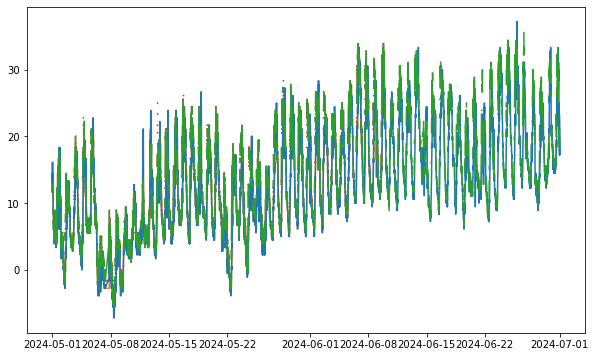

In [7]:
plt.figure(figsize=(10,6))
plt.plot(outTemp_df.index, outTemp_df['outdoor temp d54e'])
plt.plot(outTempNew_df.index, outTempNew_df['outdoor temp d54e'], zorder=-1)
plt.plot(outTemp_df.index, outTemp_df['outdoor temp f877'])
plt.plot(outTempNew_df.index, outTempNew_df['outdoor temp f877'], zorder=-1)

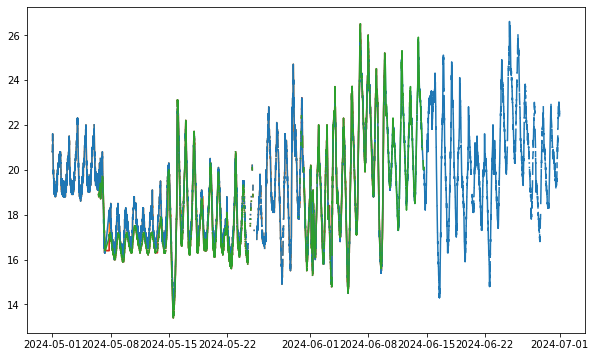

In [8]:
plt.figure(figsize=(10,6))
plt.plot(inTemp_df.index, inTemp_df['indoor temp pm25'])
plt.plot(inTempNew_df.index, inTempNew_df['indoor temp pm25'], zorder=-1)
plt.plot(inTemp_df.index, inTemp_df['indoor temp radon'])
plt.plot(inTempNew_df.index, inTempNew_df['indoor temp radon'], zorder=-1)